In [3]:
%load_ext autoreload
%autoreload 2

# Add parent directory into system path
import sys, os
import numpy as np
sys.path.insert(1, os.path.abspath(os.path.normpath('..')))

import os
from utils.dataset import ImplicitDataset, RandomMeshSDFDataset, batch_loader
from utils.visualizer import SDFVisualize

visualizer = SDFVisualize()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImplicitDataset (195112 PDE points, 6025 Dirichlet BCs)


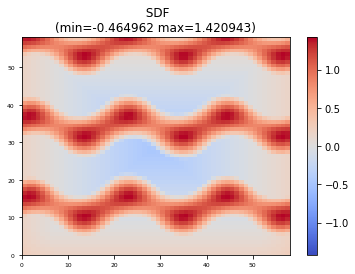

[]

In [15]:

dataset_name = '../datasets/box_1f0_gyroid_4pi'
output_stl = dataset_name+'.stl'
train_dataset = ImplicitDataset.from_file(file=dataset_name+'_train.npz')
print(train_dataset)

n_dim = round(train_dataset.pde_points.shape[0]**(1/3))
P = train_dataset.pde_points.reshape((n_dim, n_dim, n_dim, 3))
lvl_sets = train_dataset.pde_sdfs.reshape((n_dim, n_dim, n_dim))
dx = P[1, 1, 1] - P[0, 0, 0]

visualizer._plot(lvl_sets[:,:,28])

# Fast marching method
# https://arxiv.org/pdf/1607.00973.pdf
import numpy as np
import heapq

known_map = {}
front_map = {}
front_heap = []

def remove_key(_map, _key):
    if _key in _map:
        del _map[_key]
def add_key(_map, _key):
    _map[_key] = True

_i = 0
for index in zip(_index_mark[0], _index_mark[1], _index_mark[2]):
    add_key(front_map, index)
    heapq.heappush(front_heap, (abs(_zero_lvl_set[_i]), index))
    _i += 1

# loop algorithm
while len(front_map) > 0:
    # 1. Find minimum entry in front
    x_min = front_heap.pop()
    # 2. Add it to known and take it out from front
    remove_key(front_map, x_min[1])
    add_key(known_map, x_min[1])
    # 3. Add unknown neighborhood of x_min to front
    # 4. 

print(len(known_map))

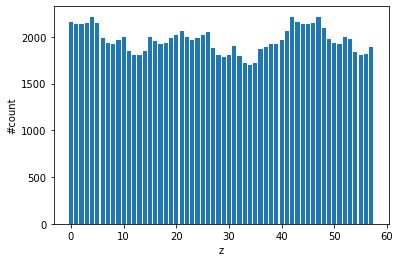

In [5]:
def print_num_points_at_each_z(_index_mark:list):
    nums_at_z = {}
    for index in zip(_index_mark[0], _index_mark[1], _index_mark[2]):
        x, y, z = index
        if z in nums_at_z:
            nums_at_z[z] += 1
        else:
            nums_at_z[z] = 1

    _sorted_tuple = list(sorted(nums_at_z.items()))
    x, height = tuple(zip(*_sorted_tuple))
    import matplotlib.pyplot as plt
    plt.bar(x, height)
    plt.xlabel('z')
    plt.ylabel('#count')
    plt.show()

print_num_points_at_each_z(_index_mark)

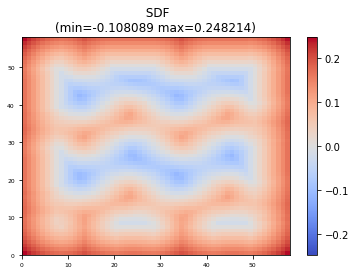

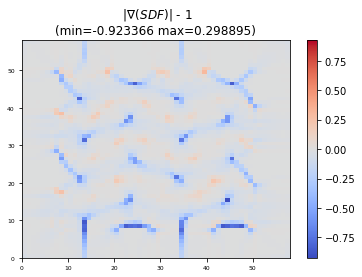

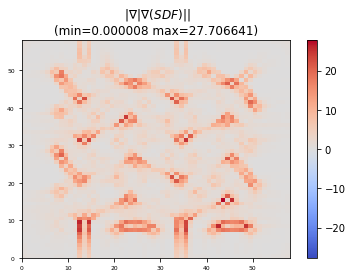

[]

In [16]:
import skfmm
_dist = skfmm.distance(lvl_sets, dx=dx)
gradient = np.linalg.norm(np.array(np.gradient(_dist, dx[0], dx[1], dx[2])), axis=0)
gradient_2 = np.linalg.norm(np.array(np.gradient(gradient, dx[0], dx[1], dx[2])), axis=0)
visualizer._plot(_dist[:,:,28], gradient[:,:,28], gradient_2[:,:,28])